TASK 2- UNEMPLOYMENT ANALYSIS WITH PYTHON

*BY INTERN GOWRI SM*

IMPORTING LIBRARIES FOR DATA VISUALIZATION AND DATA MANIPULATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


LOADING THE DATASET

In [3]:
# Load the dataset
df = pd.read_csv('/content/Unemployment in India.csv')

DISPLAYING THE FIRST FEW ROWS OF THE DATASET

In [4]:
# Display first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


GETTING INFORMATION ABOUT THE DATASET

In [5]:
# Get information about the dataset
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


STATISTICAL SUMMARY ABOUT THE DATASET

In [6]:
# Get statistical summary of the dataset
print("\nDataset Description:")
print(df.describe())


Dataset Description:
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                        

CHECKING MISSING VALUES

In [7]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())



Missing Values in Dataset:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [9]:
# Handling missing values (if any)
df = df.dropna()  # Dropping missing values for simplicity

VISUALIZING UNEMPLOYMENT RATE DISTRIBUTION

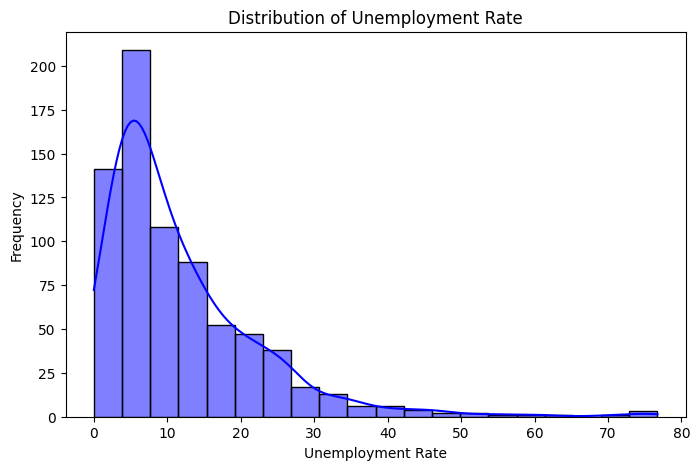

In [29]:
# Visualizing Unemployment Rate Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[' Estimated Unemployment Rate (%)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

AVERAGE UNEMPLOYMENT RATE BY REGION

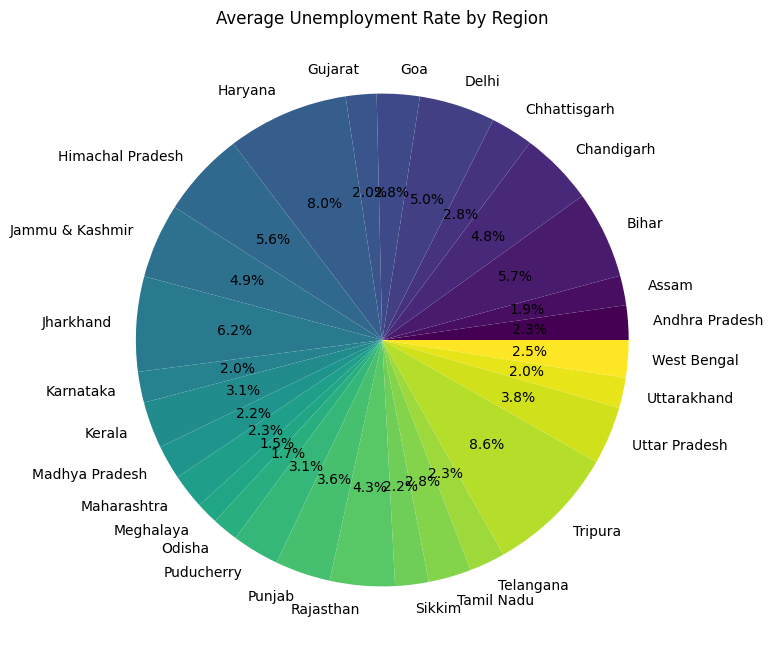

In [30]:
# Pie Chart of Unemployment Rate by Region
plt.figure(figsize=(8, 8))
df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().plot(kind='pie', autopct='%1.1f%%', colormap='viridis')
plt.title('Average Unemployment Rate by Region')
plt.ylabel('')
plt.show()

UNEMPLOYMENT RATE OVER TIME

<ipython-input-31-deb61ee05a17>:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df[' Date'])


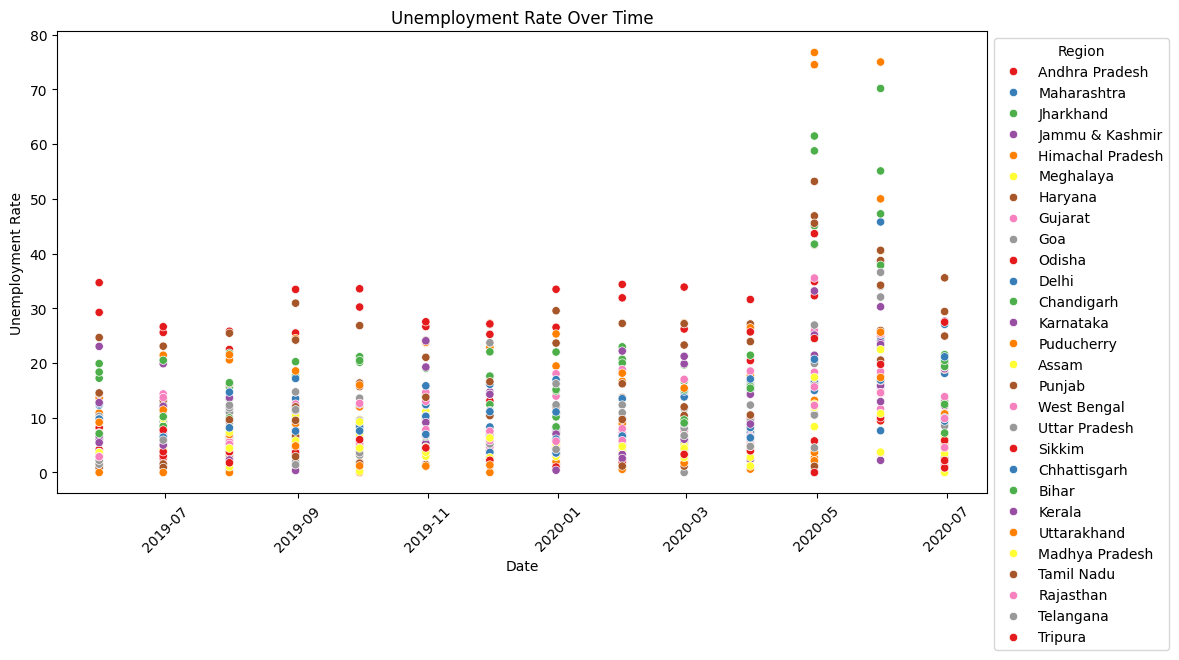

In [31]:
# Scatter Plot of Unemployment Rate vs. Date
plt.figure(figsize=(12, 6))
df['Date'] = pd.to_datetime(df[' Date'])
sns.scatterplot(x='Date', y=' Estimated Unemployment Rate (%)', data=df, hue='Region', palette='Set1')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.show()

CORRELATION HEATMAP

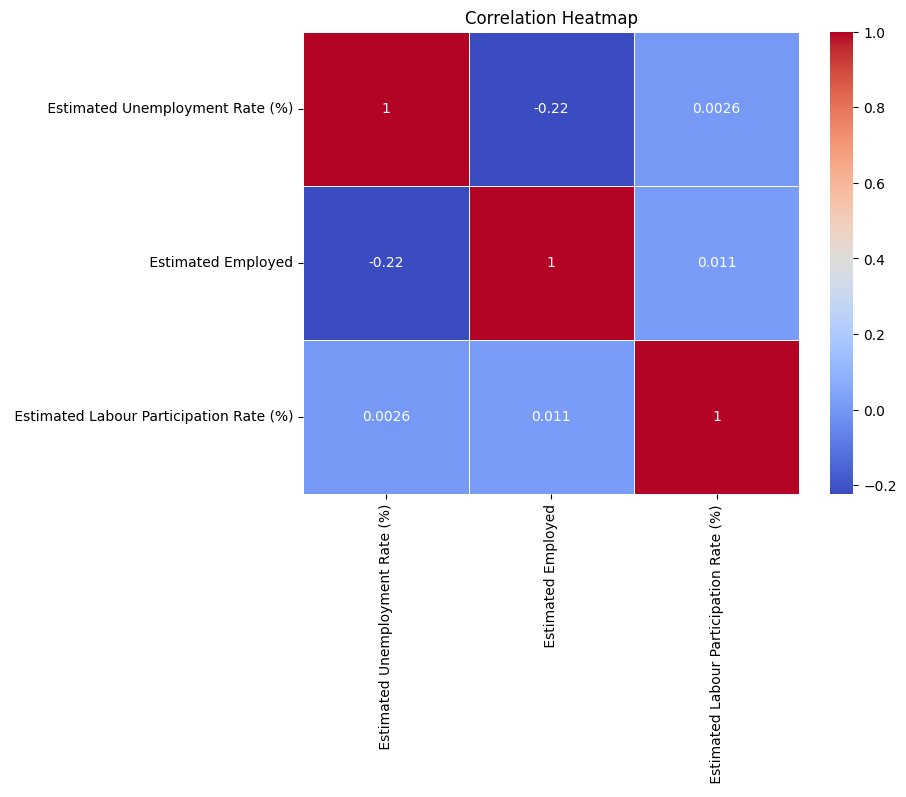

In [18]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

PERCENTAGE CHANGE IN UNEMPLOYMENT RATE AFTER LOCKDOWN

In [32]:
# Calculate Percentage Change in Unemployment Rate After Lockdown
df = df.sort_values(by='Date')  # Ensure data is sorted by date'
df['Unemployment Change (%)'] = df[' Estimated Unemployment Rate (%)'].pct_change() * 100

In [22]:
# Display Percentage Change
print("\nPercentage Change in Unemployment Rate After Lockdown:")
print(df[['Date', ' Estimated Unemployment Rate (%)', 'Unemployment Change (%)']].dropna())  # Changed 'Unemployment Rate' to ' Estimated Unemployment Rate (%)'


Percentage Change in Unemployment Rate After Lockdown:
          Date   Estimated Unemployment Rate (%)  Unemployment Change (%)
575 2019-05-31                              6.08                66.575342
519 2019-05-31                             17.23               183.388158
509 2019-05-31                             23.04                33.720255
495 2019-05-31                             10.88               -52.777778
589 2019-05-31                              8.40               -22.794118
..         ...                               ...                      ...
440 2020-06-30                             27.07               152.754435
480 2020-06-30                              4.54               -83.228666
588 2020-06-30                             10.01               120.484581
711 2020-06-30                             27.47               174.425574
753 2020-06-30                              9.86               -64.106298

[739 rows x 3 columns]


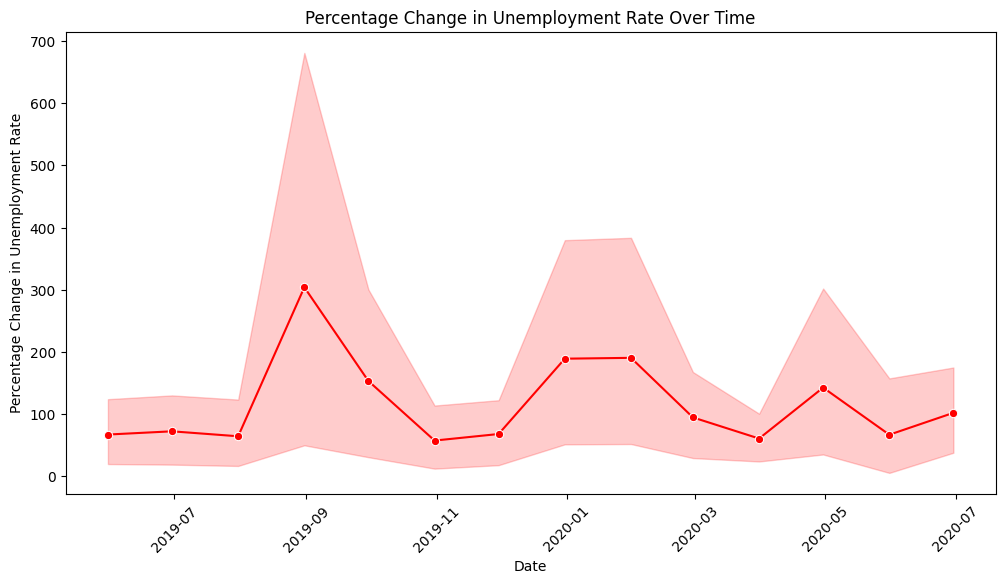

In [23]:
# Plot Percentage Change Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Unemployment Change (%)', data=df, marker='o', color='red')
plt.title('Percentage Change in Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change in Unemployment Rate')
plt.xticks(rotation=45)
plt.show()


IDENTIFYING MOST UNEMPLOYMENT-AFFECTED STATES

In [33]:
# Identify Most Unemployment-Affected States
df_statewise = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

print("\nMost Unemployment-Affected States/Regions:")
print(df_statewise)


Most Unemployment-Affected States/Regions:
Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Punjab              12.031071
Puducherry          10.215000
Kerala              10.123929
Tamil Nadu           9.284286
Goa                  9.274167
Chhattisgarh         9.240357
West Bengal          8.124643
Telangana            7.737857
Maharashtra          7.557500
Andhra Pradesh       7.477143
Madhya Pradesh       7.406429
Sikkim               7.249412
Karnataka            6.676071
Gujarat              6.663929
Uttarakhand          6.582963
Assam                6.428077
Odisha               5.657857
Meghalaya            4.798889
Name:  Estimated Unemployment Rate (%), dtype: float64


<ipython-input-26-00bfc7af632f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_statewise.index, y=df_statewise.values, palette='Reds_r')


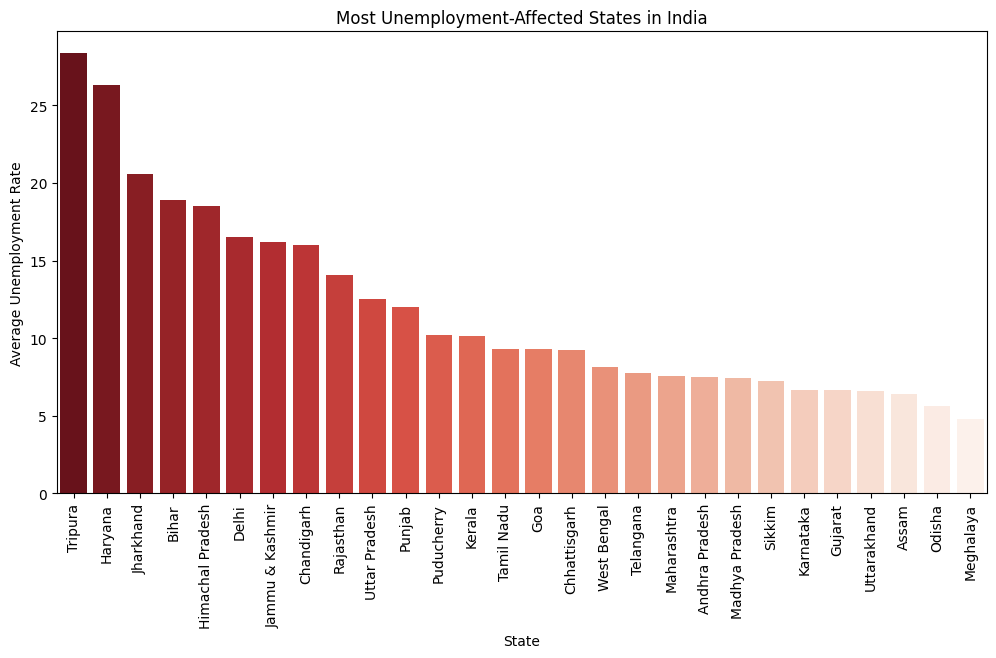

In [26]:
# Bar Chart for Most Affected States
plt.figure(figsize=(12, 6))
sns.barplot(x=df_statewise.index, y=df_statewise.values, palette='Reds_r')
plt.title('Most Unemployment-Affected States in India')
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate')
plt.xticks(rotation=90)
plt.show()


UNEMPLOYMENT RATE OVER DIFFERENT AREAS

<ipython-input-34-74c415d86479>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Area'].unique(), y=df.groupby('Area')[' Estimated Unemployment Rate (%)'].mean(), palette='Blues_r')


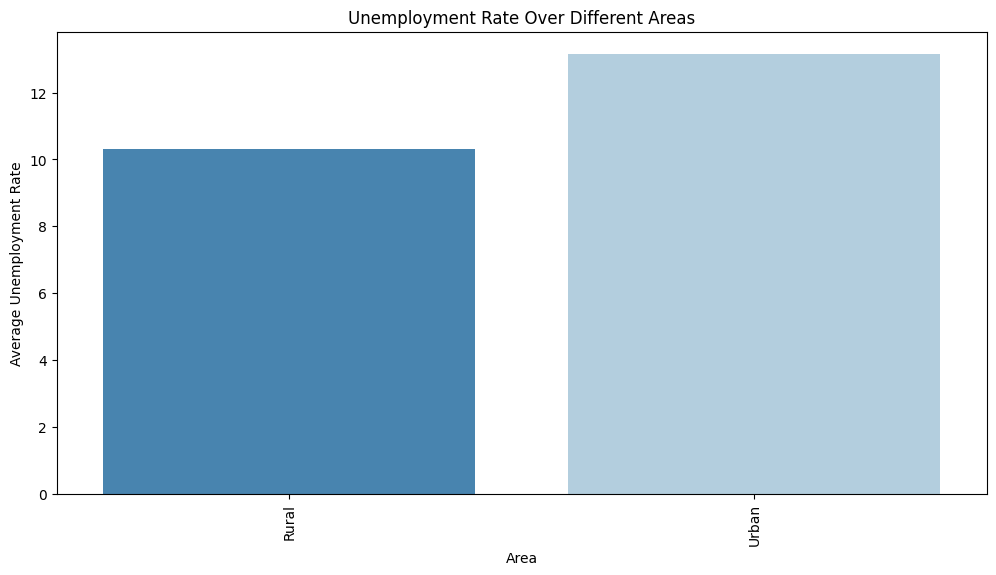

In [34]:
# Unemployment Rate Over Different Areas
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Area'].unique(), y=df.groupby('Area')[' Estimated Unemployment Rate (%)'].mean(), palette='Blues_r')
plt.title('Unemployment Rate Over Different Areas')
plt.xlabel('Area')
plt.ylabel('Average Unemployment Rate')
plt.xticks(rotation=90)
plt.show()